# Working with tabular data

In the last class, we discussed how to work with numerical data through arrays and matrices in cases when *all the data were of the same type*. You encounter this often, so `numpy` is a powerful tool for working with such homogeneous data (data of the same type) and in such cases is often the preferred tool if you want to do numeric computations because of its speed. However, there are several frequently encountered situations in which `numpy` tools may not be ideal and where instead the `pandas` library may be best. These include:

1. If you do not have purely numerical data (i.e. if your data are heterogeneous), and therefore have a mix of data types, `numpy` may not be appropriate, while `pandas` can easily handle and analyze mixed data types
2. If you have tabular data, `pandas` makes life much easier to **describe**, **summarize**, **query**, and **visualize** the data than the equivalent processes with `numpy`.

## Mixed data types
Often our data are of mixed types (e.g. integers and strings). This happens all the time. Imagine that you are collecting basic medical information from a patient. You may ask for height and weight (numerical, floating point numbers), age (integer), and blood type (categorical, string). While numpy can store these together in an array, there's not much you're going to be able to do with it computationally. Consider the following example where `numpy` throws an error:

```
import numpy as np
a = np.array([6.1,150.0,25,'A-'])
b = np.array([5.6,122.0,29,'B+'])
c = a + b
```

```
---------------------------------------------------------------------------
UFuncTypeError                            Traceback (most recent call last)
c:\Users\kjb17\Dropbox\Code\mids_coursera\class_3\week_2\10_intro_to_pandas.ipynb Cell 2' in <module>
      2 a = np.array([6.1,150.0,25,'A-'])
      3 b = np.array([5.6,122.0,29,'B+'])
----> 4 c = a + b

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> None
```

`pandas`, on the other hand, doesn't have any problem with mixed data types. It will use the appropriate operation for each data type, adding the numbers and concatenating the strings:

In [1]:
import pandas as pd

a = pd.Series([6.1, 150.0, 25, "A-"])
b = pd.Series([5.6, 122.0, 29, "B+"])
c = a + b
c

0     11.7
1    272.0
2       54
3     A-B+
dtype: object

> In the summer of 2023, the `pandas` package was updated to `pandas 2.0`. In *most* cases, `pandas 2.0` operates in the same manner as `pandas 1.0`, but there are a few important differences. *All* materials in this course reflect the behavior of `pandas 2.0`, and where the behavior of `pandas 2.0` is notably different from the behavior of previous versions of `pandas`, we will note that explicitly.
>
> It is important you understand this change took place recently because the various versions of `pandas 1.x` (e.g., `pandas 1.0, 1.1, 1.2, ...`) were around for over three years, and much of the behavior of `pandas 1.x` was also present before `pandas 1.0` was released. As a result, a *lot* of answers you find on resources like StackOverflow or Google, or code you get from generative AI tools like `chatGPT` or `Github Copilot` will be based on behavior that, in places, may now be out of date!

## A hierarchy of data types: from lists to `numpy` arrays to `pandas` Series and DataFrames

In this section, we're introducing `pandas` objects/data types including the `Series` and the `DataFrames`. 

We can think of a `pandas` `Series` as a 1-dimensional numpy array with more functionality for selecting and querying data than we get in a 1-dimensional `numpy` array. `DataFrames`, similarly, are a collection of `Series` analogous to a 2-D numpy array, but with even more querying tools built into the objects themselves.

## Effectively working with tabular data

Let's walk through 3 examples of what you can do easily with `pandas` that can be rather complicated without it:

1. Quickly reading your data into a structured tabular form 
2. Quickly describe/summarize your data
3. Quickly querying your dataset
4. Quickly plotting your data

### Example 1: Quickly reading your data into a structured tabular form

Using the convenient `pandas` methods that hide away the tricky bits, loading tabular data is trivially easy. Let's load in a dataset to demonstrate (we'll talk more about how these work throughout this week):

In [2]:
import pandas as pd

smallworld = pd.read_csv("../../Example_Data/world-very-small.csv")
smallworld

,country,region,gdp_per_capita_2008
0,Brazil,S. America,10296
1,Germany,W. Europe,35613
2,Mexico,N. America,14495
3,Mozambique,Africa,855
4,Russia,C&E Europe,16139
5,Ukraine,C&E Europe,7271


It really doesn't get much easier than that. We have text content (under `country` and `region`) and numerical content (`gdp_per_capita_2008``) and column headings are even included!

### Example 2: Quickly describe / summarize your data

With the use of a single `pandas` method, we can summarize the statistics of any fully-numerical columns of data:

In [3]:
smallworld.describe()

,gdp_per_capita_2008
count,6.000000
mean,14111.500000
std,11863.031683
min,855.000000
25%,8027.250000
50%,12395.500000
75%,15728.000000
max,35613.000000


### Example 3 Quickly querying your data

Not only can we load and describe our data quickly, but we can query our data quickly, too. Let's say we wanted to find the countries on the list with per-capita GDP below $10,000. This also becomes extremely simple:


In [4]:
smallworld.loc[smallworld.gdp_per_capita_2008 < 10000]

,country,region,gdp_per_capita_2008
3,Mozambique,Africa,855
5,Ukraine,C&E Europe,7271


### Example 4: Quickly plotting your data

If you want/need a quick look at your data, plotting is extremely straightforward with `pandas`, as it builds on the `matplotlib` ecosystem for plotting. Let's create a bar plot of the GDP per capita for each of the countries in our list:

<AxesSubplot:xlabel='country'>

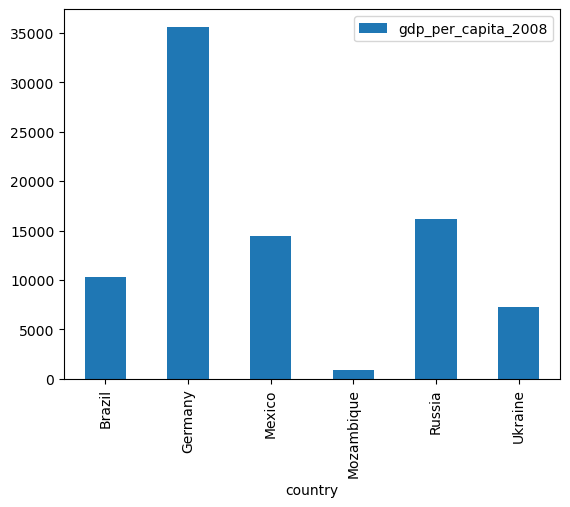

In [5]:
smallworld.plot.bar(x="country", y="gdp_per_capita_2008")

### Drawbacks of `pandas`

Despite its many advantages, and as with all tools, `pandas` also has its drawbacks. First of all, the syntax of `pandas` is a bit different from what we've discussed previously with base Python and with `numpy`, making it a bit challenging to learn. Personally, I still find myself regularly consulting the documentation for `pandas` when I'm using a method I haven't used in a while. The other drawback is that `pandas` is particularly well-designed for 1D series/arrays and 2D matrices. It's not suitable for handling 3D or N-D matrices (where N > 3). In such cases, there are two main options. The first is to simply revert to our trustworthy friend `numpy` — it's extremely flexible, powerful, and you already know how to use it! The second option is to use the [xarray](https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html) package, which is to higher-dimensional numpy arrays what pandas is to 1 or 2D numpy arrays — essentially a wrapper around numpy arrays that adds an ability to label your dimensions in a more intuitive manner!

### The week ahead

With a sense of the benefits of `pandas`, this week we will dive into how `pandas` can be effectively deployed as a key programming tool in working with tabular data and used to construct targeted, and sometimes complicated, queries of tabular data that can be used to answer key data science questions.